# Lesson - Conditional Plots
- We'll be working with the seaborn visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library.
- The data set was compiled by Kaggle for their introductory data science competition, called Titanic: Machine Learning from Disaster. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes. We can download the data set by navigating to the (data download page)[https://www.kaggle.com/c/titanic/data].
- Out of the two data files, we will be working with `train.csv` file.

## Step-1: Data Exploration and Cleaning
- We will read train.csv into a DataFrame named titanic. Keep only the following columns:
"Survived"
"Pclass"
"Sex"
"Age"
"SibSp"
"Parch"
"Fare"
"Embarked"
- Use the DataFrame.dropna() method to remove rows containing missing values.

In [1]:
import pandas as pd
titanic=pd.read_csv('train.csv')
print(titanic.info())
print(titanic.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [2]:
print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
titanic=titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
titanic=titanic.dropna()
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Generating Histogram in Seaborn

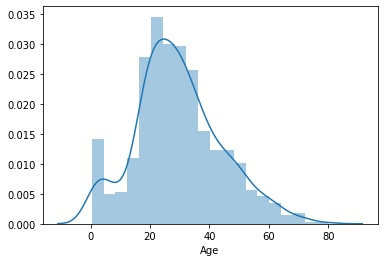

In [6]:
sns.distplot(titanic["Age"])
plt.show()

### Generating a Kernel Density Plot

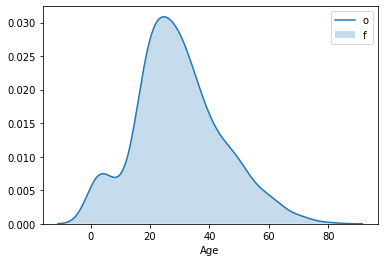

In [10]:
sns.kdeplot(titanic["Age"],shade=True)
plt.xlabel('Age')
plt.show()

### Modifying Graph Appearance
The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the `seaborn.set_style()` function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

`darkgrid`: Coordinate grid displayed, dark background color
`whitegrid`: Coordinate grid displayed, white background color
`dark`: Coordinate grid hidden, dark background color
`white`: Coordinate grid hidden, white background color
`ticks`: Coordinate grid hidden, white background color, ticks visible
`sns.set_style("darkgrid")`

To remove the axis spines for the top and right axes, we use the `seaborn.despine()` function:
By default, only the top and right axes will be despined, or have their spines removed. To despine the other two axes, we need to set the left and bottom parameters to True.

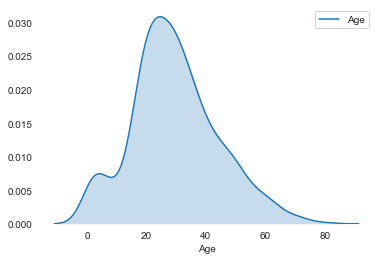

In [11]:
sns.set_style('white')
sns.kdeplot(titanic["Age"],shade=True)
sns.despine(left=True,bottom=True)
plt.xlabel('Age')
plt.show()


In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the `"Age" `column where `Survived` equalled 0 and the other would visualize the distribution of values in the `"Age"` column where `Survived` equalled 1.
The code to generate the pair of plots, is short and sweet:
```
sns.set_style("darkgrid")
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
```
Seaborn handled:

subsetting the data into rows where `Survived` is 0 and where `Survived` is 1
creating both Axes objects, ensuring the same axis scales
plotting both kernel density plots
Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The `seaborn.FacetGrid object` is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from FacetGrid is another word for "subset". Setting the col parameter to `"Survived"` specifies a separate plot for each unique value in the Survived column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the `FacetGrid.map(`) method to specify the plot we want for each unique value of Survived. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into `FacetGrid.map()` has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:
```
g = sns.FacetGrid(titanic, col="Survived", size=6)
g.map(plt.hist, "Age")
```
Use a FacetGrid instance to generate three plots on the same row:
- One for each unique value of Pclass.
- Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
- Use a FacetGrid instance to generate three plots on the same row:
  - One for each unique value of Pclass.
  - Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.

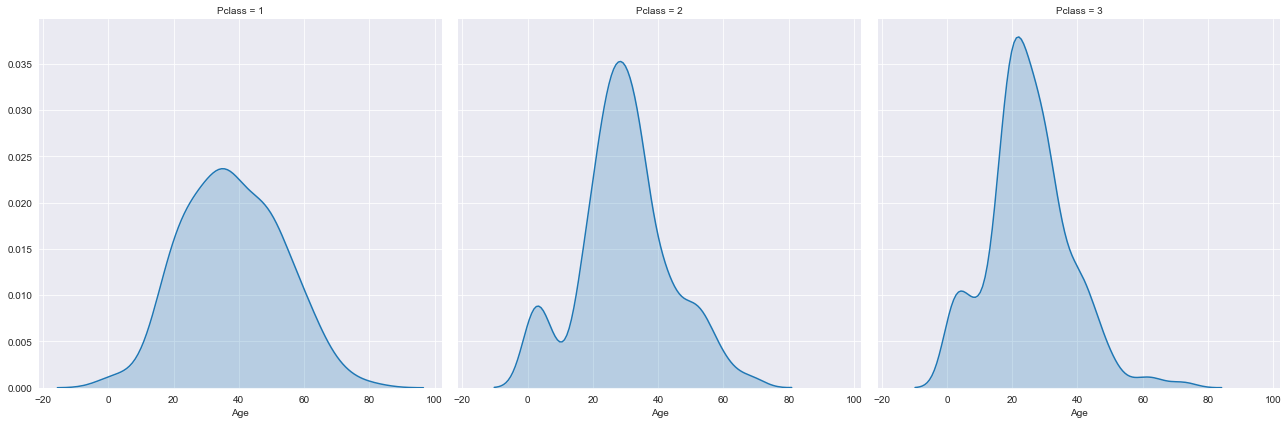

In [18]:
sns.set_style('darkgrid')
sns.FacetGrid(titanic,col='Pclass',height=6).map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)

### Creating Conditional Plots using 2 Conditions

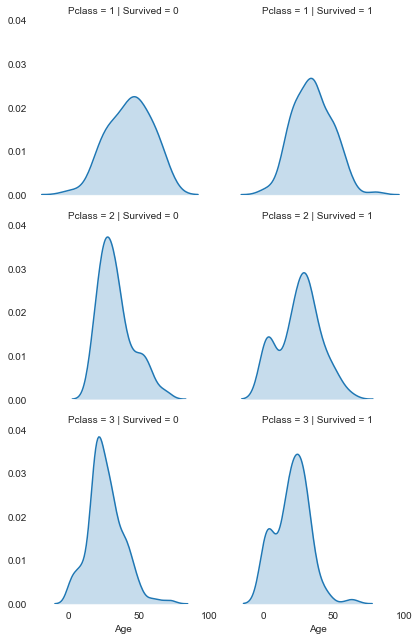

In [22]:
sns.set_style('white')
sns.FacetGrid(titanic,col='Survived',row='Pclass',height=3).map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)

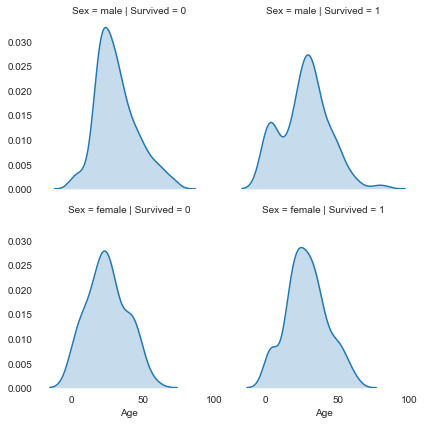

In [23]:
sns.set_style('white')
sns.FacetGrid(titanic,col='Survived',row='Sex',height=3).map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)

### Creating Conditional Plots using 3 Conditions

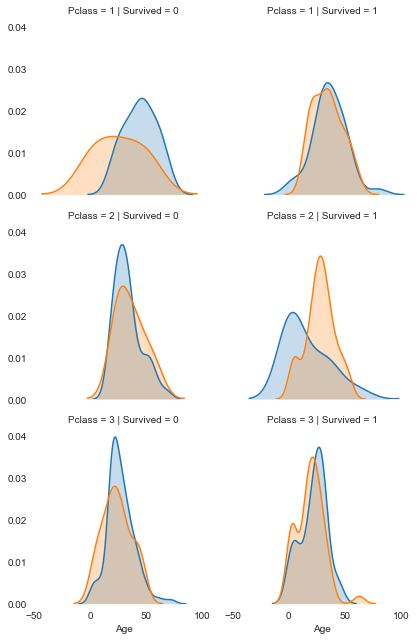

In [24]:
sns.set_style('white')
sns.FacetGrid(titanic,col='Survived',row='Pclass',hue='Sex',height=3).map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)
plt.show()

### Adding a Legend

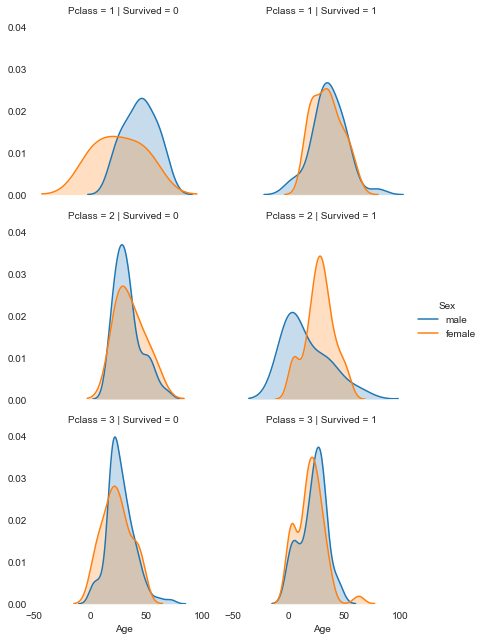

In [27]:
sns.set_style('white')
sns.FacetGrid(titanic,col='Survived',row='Pclass',hue='Sex',height=3).map(sns.kdeplot,'Age',shade=True).add_legend()
sns.despine(left=True,bottom=True)